# IMPORT LIBRERIAS

In [1]:
#Cargo las bibliotecas necesarias para realizar el ejercicio

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math 
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# UPLOAD ARCHIVOS

In [2]:
#Cargo y leo el archivo

archivo = 'creditcard.csv'

df = pd.read_csv(archivo)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# ANALYZING DATA

<AxesSubplot:>

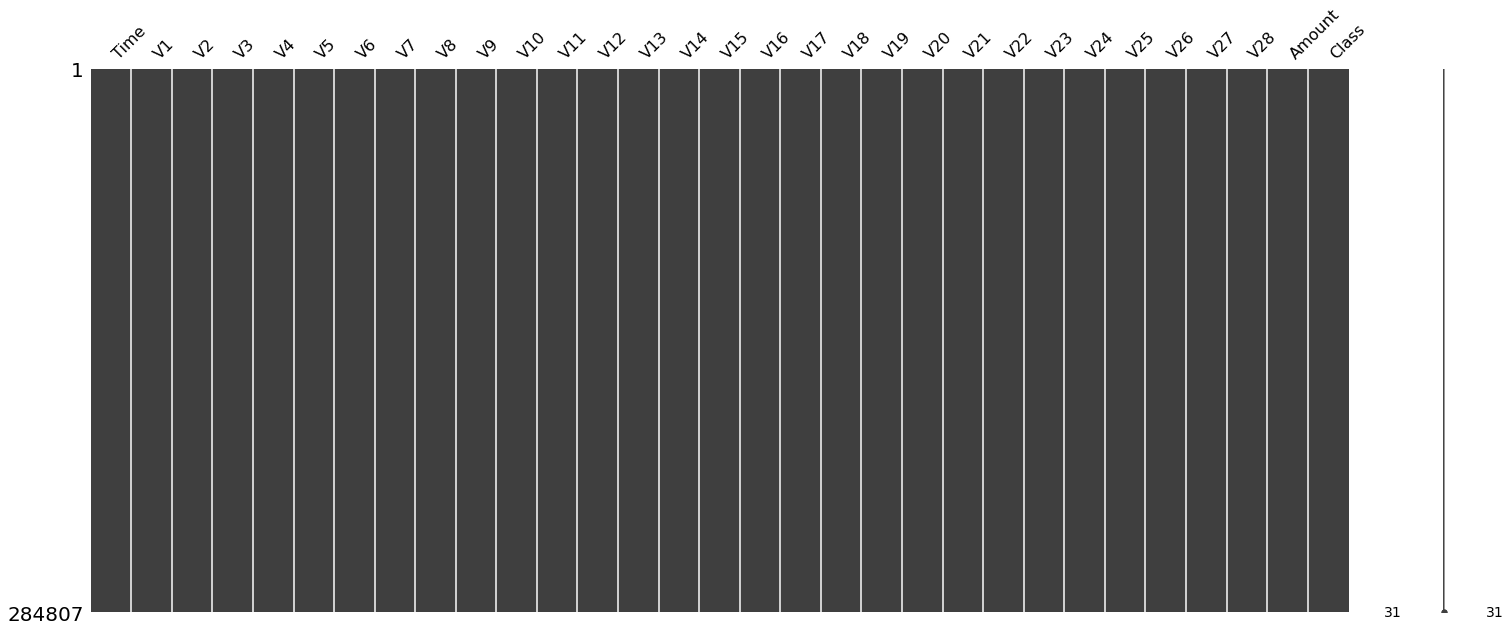

In [4]:
#Importo una libreria mas para poder visualizar si hay algun dato missing

import missingno as msno

msno.matrix(df)

<AxesSubplot:>

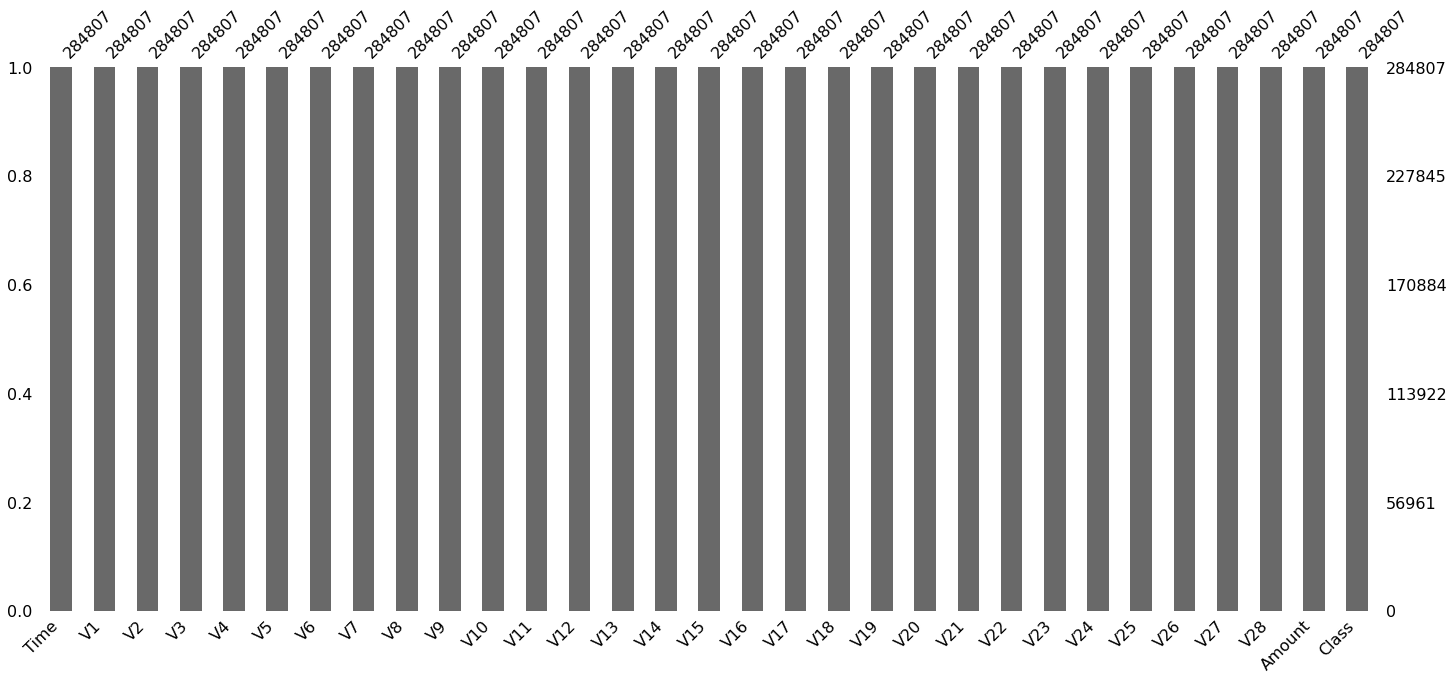

In [5]:
msno.bar(df)


In [6]:
# Miro si hay valores nulos

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# ANALISIS ASIMETRIA

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

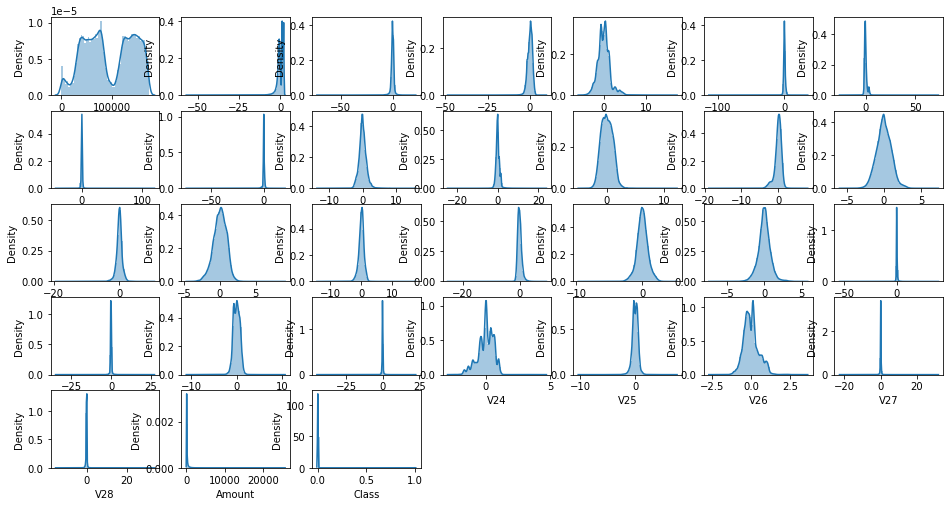

In [7]:
# Analizo la distribucion que tienen los datos para ver si es necesario una correccion de la asimetria 


data_columns = df._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(16,10))

# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    sns.distplot(df[data_columns[i]], kde=True) 

In [8]:
# Con la correccion de la asimetria hacemos que tengan una distribucion mas parecia a la campana de Gaus

positively_skewed_cols = ['V4', 'V6', 'V7', 'V11', 'V15', 'V28']
negatively_skewed_cols = ['V1', 'V2', 'V3', 'V5', 'V8', 'V12']

# OUTLINERS

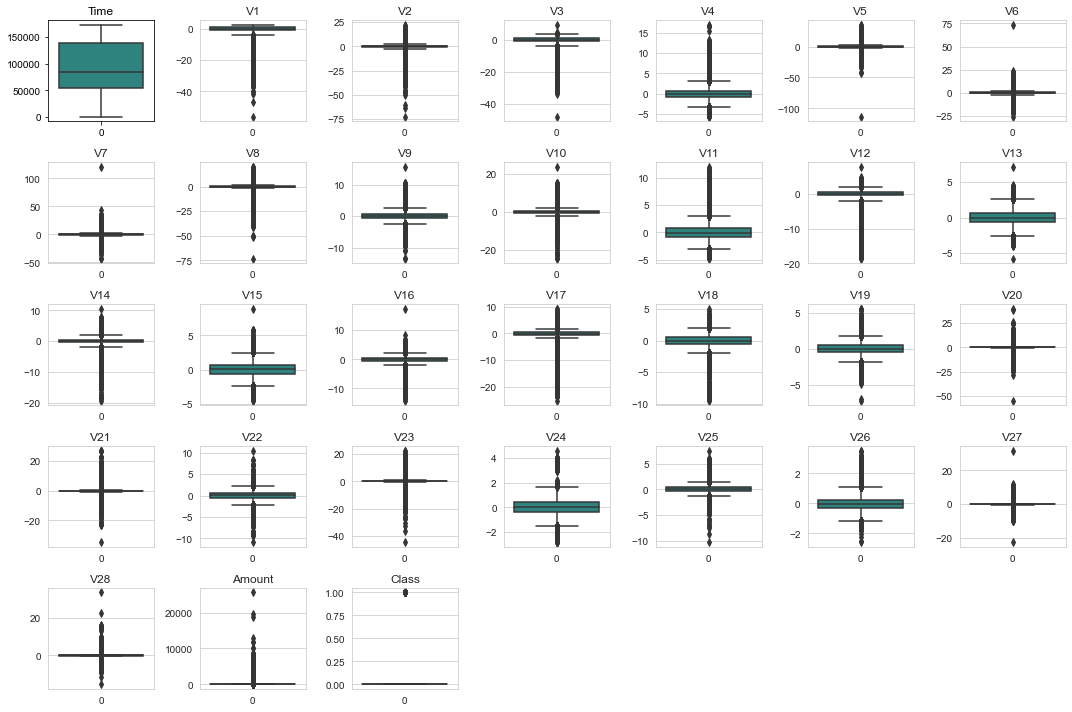

In [9]:
# Miramos si hay valores que se escapen donde se concentran la mayoria de muestras

data_columns = df._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(15,10))
for i in range(0,len(data_columns)):
    plt.subplot(number_of_columns, number_of_rows, i+1)
    sns.set_style(style='whitegrid')
    sns.boxplot(data=df[data_columns[i]],palette='viridis',orient='v')
    plt.title(data_columns[i])
    plt.tight_layout()

# NORMALIZAR

In [10]:
# Despues de corregir la asimetria, pasamos a normalizar los datos para que se puedan modelizar

from sklearn.preprocessing import StandardScaler

target = df.pop('Class')
sc = StandardScaler()                               #Objeto estandarizador (Z-transform)
model_norm = sc.fit(df.loc[:])             #Z_transform para todas las variables excepto OutCome
df.loc[:] = model_norm.transform(df.loc[:])

In [11]:
df = pd.concat([df,target],axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


<AxesSubplot:>

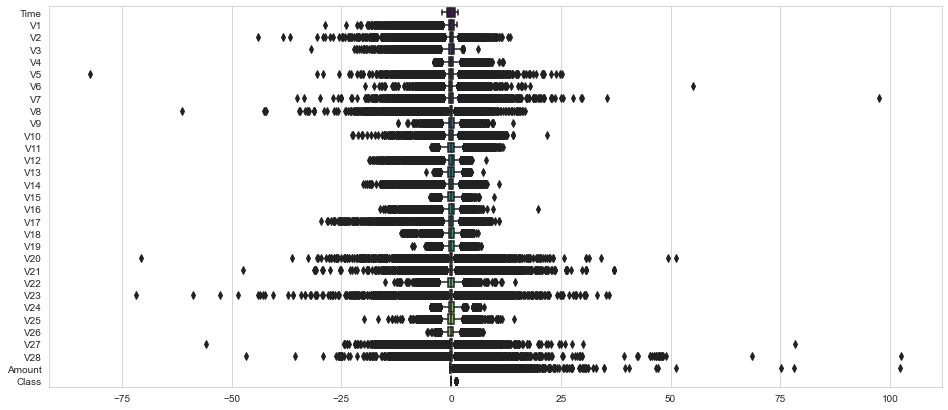

In [12]:
# Mostramos 

plt.figure(figsize=(16,7))
sns.boxplot(data=df.loc[:] , orient="h", palette="viridis")

# BALANCE DE DATOS

In [13]:
# Los datos estan muy desbalanceados:
# Apenas un 0,17% de transacciones clasificadas como fraude

df['Class'].value_counts() / len (df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Estan muy desbalanceados.

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# MODELO

In [15]:
# Definimos las variables para modelizar

X = df.drop('Class', axis=1)
y = df['Class']

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [16]:
# Realizamos la técnica SMOTE para balancear los datos

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Balance antes del X SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance de calses positivas y negativas (%):')
y_sm.value_counts(normalize=True) * 100

Balance antes del X SMOTE: (284807, 30)
Shape of X after SMOTE: (568630, 30)

Balance de calses positivas y negativas (%):


1    50.0
0    50.0
Name: Class, dtype: float64

In [17]:
# Realizamos el split entre variables de entrenamiento y testeo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42, shuffle=True)

In [18]:
# PAsamos las variables de entrenamiento a numpy 

X_tf_train = X_train.to_numpy()
y_tf_train = y_train.to_numpy()

# PASAR A FORMATO TENSOR

In [19]:
# Con el formato numpy de las variables de entrenamiento podemos pasarlas a formato tensor

def create_tf_xy_from_np (np_data, batch_size=32):
    """ Creación de un tensorflow anidado con X e y por lotes para entrenamiento en Keras
        Input:  np_data: matriz numpy con los datos. la variable target está en la última columna
                batch_size: medida del batch
    """

    #Convertimos a tensor anidado
    tf_data = tf.data.Dataset.from_tensor_slices(np_data)
    
    #Dentro del tensor anidado separamos en dos tensores => X e y
    tf_data = tf_data.map(lambda val: (val[:-1], [val[-1]])) 
    
    #Montamos los lotes
    tf_data = tf_data.batch(batch_size)
    
    return tf_data

In [20]:
np_train = np.concatenate ((X_train, pd.DataFrame(y_train)), axis=1)
xy_train = create_tf_xy_from_np(np_train,16)

In [21]:
xy_test = create_tf_xy_from_np(np.concatenate ((X_test, pd.DataFrame(y_test)), axis=1))

# ENTRENAMIENTO DEL MODELO

In [22]:
# Entrenamos el modelo

tf.keras.backend.clear_session()
tf.random.set_seed(11)
np.random.seed(11)

In [23]:
num_inputs = X_train.shape[1]

model = Sequential()

model.add(Dense(12, input_shape=(num_inputs,), activation='relu'))              #Capa 1 de salida 4
model.add(Dense(8, activation='relu'))                                          #Capa 2 de salida 2
model.add(Dense(2, activation='softmax'))                                       #Capa 3 de salida 2

model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
num_inputs = X_train.shape[1]

model = Sequential()

model.add(Dense(12, input_shape=(num_inputs,), activation='relu'))              #Capa 1 de salida 4
model.add(Dense(8, activation='relu'))                                          #Capa 2 de salida 2
model.add(Dense(1, activation='sigmoid'))                                       #Capa 3 de salida 1

model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist = model.fit(xy_train, epochs=20, verbose=1, validation_data=xy_test)  

Epoch 1/20
26655/26655 [==============================] - 22s 769us/step - loss: 0.0488 - accuracy: 0.9827 - val_loss: 0.0145 - val_accuracy: 0.9959
Epoch 2/20
26655/26655 [==============================] - 21s 805us/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0166 - val_accuracy: 0.9953
Epoch 3/20
26655/26655 [==============================] - 21s 803us/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 4/20
26655/26655 [==============================] - 22s 838us/step - loss: 0.0112 - accuracy: 0.9974 - val_loss: 0.0100 - val_accuracy: 0.9977
Epoch 5/20
26655/26655 [==============================] - 22s 812us/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0102 - val_accuracy: 0.9978
Epoch 6/20
26655/26655 [==============================] - 22s 814us/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0088 - val_accuracy: 0.9981
Epoch 7/20
26655/26655 [==============================] - 21s 792us/step - loss: 0.0091 - accuracy: 0.9981

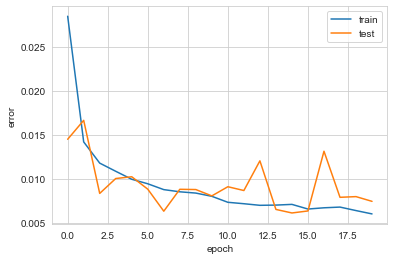

In [27]:
#Graficamos la perdida de valor en train y test

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')

plt.xlabel('epoch')
plt.ylabel('error')
plt.legend();

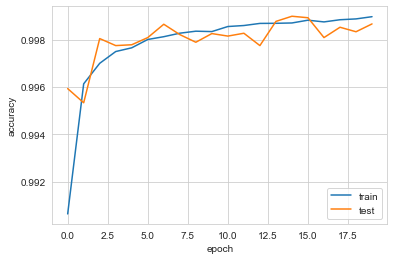

In [28]:
# Graficamos la precision en train y test

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

# PERFORMANCE DEL MODELO

In [29]:
# Obteemos la prediccion con la variable test

y_pred = model.predict_classes(X_test.to_numpy())
y_pred

J:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [30]:
# Calculamos la accuracy, el recall y el f1-score

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print('\033[1m' + 'Confusion Matrix for Keras Model','\033[0m', '\n')

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support,classification_report

print('\n\033[1m' + 'Accuracy for Keras Model','\033[0m', '\n')

print ('Accuracy: ', accuracy_score(y_test, y_pred) )


print(classification_report(y_test, y_pred))

Confusion Matrix for Keras Model  

[[70916   107]
 [   83 71052]]

Accuracy for Keras Model  

Accuracy:  0.9986634589681903
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



J:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC score: 0.9986633251277708


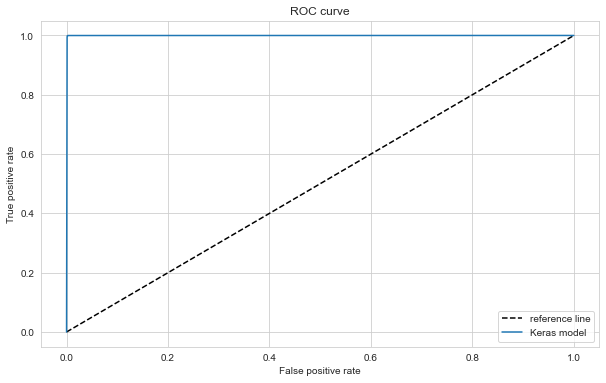

In [31]:
#Calculamos la Roc curve y la graficamos

from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict_proba(X_test.to_numpy())[:, 0]  #probabilities for every prediction

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
AUC_score = roc_auc_score(y_test, y_pred)
print('AUC score:', AUC_score)

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--', label='reference line')
plt.plot(fpr, tpr, label='Keras model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()